In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

### World Cup Matches

In [3]:
WorldCupMatches = pd.read_csv("WorldCupMatches.csv")
WorldCupMatches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [4]:
WorldCupMatches.shape

(4572, 20)

In [5]:
WorldCupMatches_cleaned = WorldCupMatches.dropna(how='all').reset_index(drop=True)

In [6]:
WorldCupMatches_cleaned.shape

(852, 20)

In [7]:
WorldCupMatches_cleaned = WorldCupMatches_cleaned.drop_duplicates().reset_index(drop=True)

In [8]:
WorldCupMatches_cleaned.shape

(836, 20)

In [9]:
WorldCupMatches_cleaned.dtypes

Year                    float64
Datetime                 object
Stage                    object
Stadium                  object
City                     object
Home Team Name           object
Home Team Goals         float64
Away Team Goals         float64
Away Team Name           object
Win conditions           object
Attendance              float64
Half-time Home Goals    float64
Half-time Away Goals    float64
Referee                  object
Assistant 1              object
Assistant 2              object
RoundID                 float64
MatchID                 float64
Home Team Initials       object
Away Team Initials       object
dtype: object

In [10]:
WorldCupMatches_cleaned['Datetime'] = pd.to_datetime(WorldCupMatches_cleaned['Datetime'])
WorldCupMatches_cleaned.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,1930-07-13 15:00:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,1930-07-13 15:00:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,1930-07-14 12:45:00,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,1930-07-14 14:50:00,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,1930-07-15 16:00:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [11]:
WorldCupMatches_cleaned['new_date'] = [d.date() for d in WorldCupMatches_cleaned['Datetime']]
WorldCupMatches_cleaned['new_time'] = [d.time() for d in WorldCupMatches_cleaned['Datetime']]
WorldCupMatches_cleaned.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,...,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,new_date,new_time
0,1930.0,1930-07-13 15:00:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,...,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX,1930-07-13,15:00:00
1,1930.0,1930-07-13 15:00:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,...,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL,1930-07-13,15:00:00
2,1930.0,1930-07-14 12:45:00,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,...,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA,1930-07-14,12:45:00
3,1930.0,1930-07-14 14:50:00,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,...,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER,1930-07-14,14:50:00
4,1930.0,1930-07-15 16:00:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,...,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA,1930-07-15,16:00:00


In [12]:
type(WorldCupMatches_cleaned['new_date'][0])

datetime.date

In [13]:
type(WorldCupMatches_cleaned['new_time'][0])

datetime.time

In [14]:
WorldCupMatches_cleaned.to_csv("WorldCupMatches_cleaned.csv", index=False)

### World Cup Players

In [15]:
WorldCupPlayers = pd.read_csv("WorldCupPlayers.csv")
WorldCupPlayers.shape
WorldCupPlayers_cleaned = WorldCupPlayers.dropna(how='all').reset_index(drop=True)
WorldCupPlayers_cleaned = WorldCupPlayers_cleaned.drop_duplicates().reset_index(drop=True)

In [17]:
WorldCupPlayers_cleaned

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN
5,201,1096,MEX,LUQUE Juan (MEX),S,0,Rafael GARZA,C,NaN
6,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Andre MASCHINOT,NaN,G43' G87'
7,201,1096,MEX,LUQUE Juan (MEX),S,0,Hilario LOPEZ,NaN,NaN
8,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Etienne MATTLER,NaN,NaN
9,201,1096,MEX,LUQUE Juan (MEX),S,0,Dionisio MEJIA,NaN,NaN


In [31]:
WorldCupMatches_cleaned['Final Goal Differential'] = WorldCupMatches_cleaned['Home Team Goals'] - WorldCupMatches_cleaned['Away Team Goals']
WorldCupMatches_cleaned['Half-time Goal Differential'] = WorldCupMatches_cleaned['Half-time Home Goals'] - WorldCupMatches_cleaned['Half-time Away Goals']
WorldCupMatches_cleaned.head()


,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,...,MatchID,Home Team Initials,Away Team Initials,new_date,new_time,Goal Differential,Winning Team,Final Goal Differential,Half-time Goal Differential,Home Team Result
450,1990.0,1990-06-24 17:00:00,Round of 16,Stadio delle Alpi,Turin,Brazil,0.0,1.0,Argentina,,...,25.0,BRA,ARG,1990-06-24,17:00:00,-1.0,Argentina,-1.0,0.0,Lost
412,1990.0,1990-06-08 18:00:00,Group B,Giuseppe Meazza,Milan,Argentina,0.0,1.0,Cameroon,,...,26.0,ARG,CMR,1990-06-08,18:00:00,-1.0,Cameroon,-1.0,0.0,Lost
463,1990.0,1990-07-08 20:00:00,Final,Stadio Olimpico,Rome,Germany FR,1.0,0.0,Argentina,,...,27.0,FRG,ARG,1990-07-08,20:00:00,1.0,Germany FR,1.0,0.0,Won
460,1990.0,1990-07-03 20:00:00,Semi-finals,San Paolo,Naples,Italy,1.0,1.0,Argentina,win on penalties (3 - 4),...,28.0,ITA,ARG,1990-07-03,20:00:00,0.0,Tie,0.0,0.0,Tie
436,1990.0,1990-06-18 21:00:00,Group B,San Paolo,Naples,Argentina,1.0,1.0,Romania,,...,29.0,ARG,ROU,1990-06-18,21:00:00,0.0,Tie,0.0,0.0,Tie


In [33]:
WorldCupMatches_cleaned['Winning Team'] = ""
WorldCupMatches_cleaned['Home Team Result'] = ""

WorldCupMatches_cleaned.loc[WorldCupMatches_cleaned['Goal Differential'] > 0, 'Winning Team'] = WorldCupMatches_cleaned.loc[WorldCupMatches_cleaned['Goal Differential'] > 0, 'Home Team Name']
WorldCupMatches_cleaned.loc[WorldCupMatches_cleaned['Goal Differential'] < 0, 'Winning Team'] = WorldCupMatches_cleaned.loc[WorldCupMatches_cleaned['Goal Differential'] < 0, 'Away Team Name']
WorldCupMatches_cleaned.loc[WorldCupMatches_cleaned['Goal Differential'] == 0, 'Winning Team'] = "Tie"

WorldCupMatches_cleaned.loc[WorldCupMatches_cleaned['Goal Differential'] > 0, 'Home Team Result'] = "Won"
WorldCupMatches_cleaned.loc[WorldCupMatches_cleaned['Goal Differential'] < 0, 'Home Team Result'] = "Lost"
WorldCupMatches_cleaned.loc[WorldCupMatches_cleaned['Goal Differential'] == 0, 'Home Team Result'] = "Tie"

WorldCupMatches_cleaned.sort_values('MatchID', inplace=True)
WorldCupMatches_cleaned.reset_index(inplace=True, drop=True)




In [34]:
WorldCupMatches_cleaned

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,...,MatchID,Home Team Initials,Away Team Initials,new_date,new_time,Goal Differential,Winning Team,Final Goal Differential,Half-time Goal Differential,Home Team Result
0,1990.0,1990-06-24 17:00:00,Round of 16,Stadio delle Alpi,Turin,Brazil,0.0,1.0,Argentina,,...,25.0,BRA,ARG,1990-06-24,17:00:00,-1.0,Argentina,-1.0,0.0,Lost
1,1990.0,1990-06-08 18:00:00,Group B,Giuseppe Meazza,Milan,Argentina,0.0,1.0,Cameroon,,...,26.0,ARG,CMR,1990-06-08,18:00:00,-1.0,Cameroon,-1.0,0.0,Lost
2,1990.0,1990-07-08 20:00:00,Final,Stadio Olimpico,Rome,Germany FR,1.0,0.0,Argentina,,...,27.0,FRG,ARG,1990-07-08,20:00:00,1.0,Germany FR,1.0,0.0,Won
3,1990.0,1990-07-03 20:00:00,Semi-finals,San Paolo,Naples,Italy,1.0,1.0,Argentina,win on penalties (3 - 4),...,28.0,ITA,ARG,1990-07-03,20:00:00,0.0,Tie,0.0,0.0,Tie
4,1990.0,1990-06-18 21:00:00,Group B,San Paolo,Naples,Argentina,1.0,1.0,Romania,,...,29.0,ARG,ROU,1990-06-18,21:00:00,0.0,Tie,0.0,0.0,Tie
5,1990.0,1990-06-13 21:00:00,Group B,San Paolo,Naples,Argentina,2.0,0.0,Soviet Union,,...,30.0,ARG,URS,1990-06-13,21:00:00,2.0,Argentina,2.0,1.0,Won
6,1990.0,1990-06-30 17:00:00,Quarter-finals,Comunale,Florence,Yugoslavia,0.0,0.0,Argentina,win on penalties (2 - 3),...,31.0,YUG,ARG,1990-06-30,17:00:00,0.0,Tie,0.0,0.0,Tie
7,1990.0,1990-06-09 21:00:00,Group A,Stadio Olimpico,Rome,Italy,1.0,0.0,Austria,,...,42.0,ITA,AUT,1990-06-09,21:00:00,1.0,Italy,1.0,0.0,Won
8,1990.0,1990-06-15 17:00:00,Group A,Comunale,Florence,Austria,0.0,1.0,Czechoslovakia,,...,43.0,AUT,TCH,1990-06-15,17:00:00,-1.0,Czechoslovakia,-1.0,-1.0,Lost
9,1990.0,1990-06-19 21:00:00,Group A,Comunale,Florence,Austria,2.0,1.0,USA,,...,48.0,AUT,USA,1990-06-19,21:00:00,1.0,Austria,1.0,0.0,Won


In [40]:
goal_diff_halftime = pd.DataFrame(WorldCupMatches_cleaned.groupby('Home Team Result')['Half-time Goal Differential'].mean())
goal_diff_halftime.reset_index(level=0, inplace=True)
goal_diff_halftime

,Home Team Result,Half-time Goal Differential
0,Lost,-0.766082
1,Tie,0.010753
2,Won,0.778706


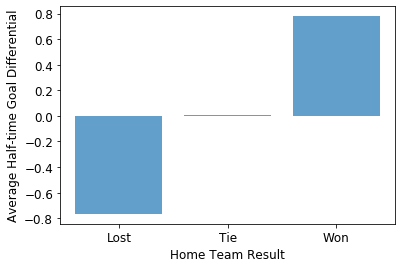

In [48]:
plt.rcParams.update({'font.size': 12})
plt.bar(np.arange(len(goal_diff_halftime['Home Team Result'])), goal_diff_halftime['Half-time Goal Differential'], 
                                                                                   align='center', alpha=.7)
plt.xticks(np.arange(len(goal_diff_halftime['Home Team Result'])), goal_diff_halftime['Home Team Result'])
plt.ylabel('Average Half-time Goal Differential')
plt.xlabel('Home Team Result')



plt.show()

In [51]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [57]:
WorldCupMatches_cleaned.columns = WorldCupMatches_cleaned.columns.str.replace(' ', '_')
WorldCupMatches_cleaned.columns = WorldCupMatches_cleaned.columns.str.replace('-', '')


In [58]:
results = smf.ols('Halftime_Goal_Differential ~ Home_Team_Result', data=WorldCupMatches_cleaned).fit()

In [60]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Halftime_Goal_Differential   R-squared:                       0.292
Model:                                    OLS   Adj. R-squared:                  0.291
Method:                         Least Squares   F-statistic:                     172.2
Date:                        Mon, 19 Aug 2019   Prob (F-statistic):           2.60e-63
Time:                                17:23:04   Log-Likelihood:                -1153.6
No. Observations:                         836   AIC:                             2313.
Df Residuals:                             833   BIC:                             2327.
Df Model:                                   2                                         
Covariance Type:                    nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -0.7661      0.074    -10.398      0.000      -0.911      -0.621
Home_Team_Result[T.Tie]     0.7768      0.102      7.611      0.000       0.576       0.977
Home_Team_Result[T.Won]     1.5448      0.086     18.000      0.000       1.376       1.713
==============================================================================
Omnibus:                      101.102   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              299.969
Skew:                           0.598   Prob(JB):                     7.29e-66
Kurtosis:                       5.680   Cond. No.                         4.92
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
aov_table = sm.stats.anova_lm(results, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
Home_Team_Result,319.620122,2.0,172.177809,2.603770e-63
Residual,773.164567,833.0,NaN,NaN
